# Detekce jednoduchých obrazových vzorů

Vytvoříme jednoduchou neuronovou síť, která rozpozná "typ" obrázku 2x2:

- vyplněný
- vertikální
- horizontální
- diagonální

Plné políčko pro nás bude 1, prázdné políčko pro nás bude -1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# so the square plots are nices
plt.rcParams['figure.figsize'] = 4, 3
plt.rcParams['figure.subplot.left'] = 0
plt.rcParams['figure.subplot.right'] = 1
plt.rcParams['figure.subplot.bottom'] = 0
plt.rcParams['figure.subplot.top'] = 1

In [7]:
x = [[1, -1],
     [-1, 1]]
x

[[1, -1], [-1, 1]]

(-0.5, 1.5, 1.5, -0.5)

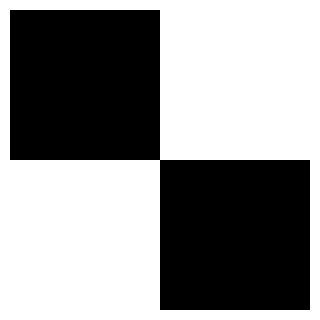

In [8]:
plt.imshow(x, cmap='gray_r', vmin=-1, vmax=1)
plt.axis('off')

In [9]:
def plot_square(x):
  plt.imshow(x, cmap='gray_r', vmin=-1, vmax=1)
  plt.axis('off')

In [10]:
x

[[1, -1], [-1, 1]]

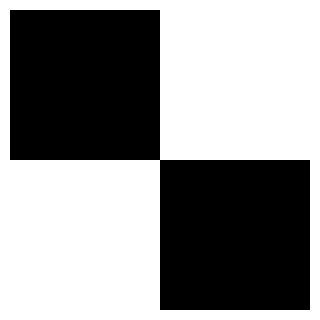

In [11]:
plot_square(x)

In [12]:
full = np.array([[1, 1], [1, 1]])
vertical = np.array([[1, -1], [1, -1]])
horizontal = np.array([[1, 1], [-1, -1]])
diagonal = np.array([[1, -1], [-1, 1]])

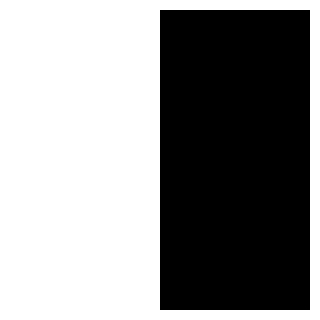

In [15]:
plot_square(-vertical)

In [16]:
-vertical

array([[-1,  1],
       [-1,  1]])

In [17]:
w1 = np.zeros((4, 4), dtype=int)
w2 = np.zeros((4, 4), dtype=int)

In [18]:
w1

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [25]:
# PRVNI VRSTVA
# neuron 0
w1[0, 0] = 1
w1[2, 0] = 1

# neuron 1
w1[1, 1] = 1
w1[3, 1] = 1

# neuron 2
w1[0, 2] = 1
w1[2, 2] = -1

# neuron 3
w1[1, 3] = 1
w1[3, 3] = -1

In [23]:
vertical.flatten()[None, :]

array([[ 1, -1,  1, -1]])

In [26]:
vertical.flatten()[None, :] @ w1

array([[ 2, -2,  0,  0]])

In [27]:
# D-RUHA VRSTVA
# neuron 0
w2[0, 0] = 1
w2[1, 0] = 1

# neuron 1
w2[0, 1] = 1
w2[1, 1] = -1

# neuron 2
w2[2, 2] = 1
w2[3, 2] = 1

# neuron 3
w2[2, 3] = 1
w2[3, 3] = -1

In [28]:
# a ještě si uložíme, co znamená který neuron
answers = {
    0: 'jednobarevný',
    1: 'vertikální',
    2: 'horizontální',
    3: 'diagonální'
}

In [32]:
(-full).flatten()[None, :] @ w1 @ w2

array([[-4,  0,  0,  0]])